In [1]:
import pandas as pd
import numpy as np
import json
import sys
from importlib import reload
sys.path.append('../../scripts/')
import utils

In [2]:
reload(utils)

<module 'utils' from '../../scripts/utils.py'>

In [3]:
with open('../gis/tib_dog_tris.geojson') as f:
    td = json.load(f)

In [4]:
td['features'][0]

{'geometry': {'coordinates': [[[124496.1, 3172901.7],
    [125070.3, 3172690.8],
    [124256.8, 3172817.9],
    [124496.1, 3172901.7]]],
  'type': 'Polygon'},
 'properties': {'POINTA': 195.0, 'POINTB': 11.0, 'POINTC': 12.0},
 'type': 'Feature'}

In [5]:
tdz = pd.read_csv('../gis/tib_dog_elev_pts.csv', index_col=2)
tdz.columns = ['x', 'y', 'z']

tdz.head()

,x,y,z
id,,,
0,100713.406808,3207692.245450,2162
1,100001.512969,3208997.384156,2084
2,99357.418542,3210099.124623,2069
3,98526.875729,3211404.263330,2041
4,97204.787169,3212336.505263,2129


In [6]:
utils.add_tri_z_values(td['features'], tdz, 'z')

In [7]:
td['features'][0]

{'geometry': {'coordinates': [[[124496.1, 3172901.7, 4000.0],
    [125070.3, 3172690.8, 3743.0],
    [124256.8, 3172817.9, 4156.0],
    [124496.1, 3172901.7, 4000.0]]],
  'type': 'Polygon'},
 'properties': {'POINTA': 195.0, 'POINTB': 11.0, 'POINTC': 12.0},
 'type': 'Feature'}

In [8]:
utils.add_tri_centers_area(td['features'])

In [9]:
utils.add_strike_dip(td['features'])
utils.add_rake_from_trend(td['features'], 127.5, 10)

In [10]:
tib_dog_pts_df = utils.tri_dict_to_df(td, fault_name='tib_dog')

In [11]:
tib_dog_pts_df.head()

x        y         z fault_name
tri vertex                                        
0   a       124496.1  3172902      4000    tib_dog
    b       125070.3  3172691      3743    tib_dog
    c       124256.8  3172818      4156    tib_dog
    m       124607.7  3172803  3966.333    tib_dog
1   a       124058.1  3173298      4000    tib_dog

In [ ]:
tib_dog_pts_df.to_csv('../fault_data/tib_dog_pts_df.csv')

In [17]:
with open('../fault_data/tib_dog_tris.geojson', 'w') as f:
    json.dump(td, f)

In [12]:
strikes = [feat['properties']['strike'] for feat in td['features']]
dips = [feat['properties']['dip'] for feat in td['features']]
rakes = [feat['properties']['rake'] for feat in td['features']]
cx = [feat['properties']['center'][0] for feat in td['features']]
cy = [feat['properties']['center'][1] for feat in td['features']]
cz = [feat['properties']['center'][2] for feat in td['features']]

In [13]:
td['features'][120]

{'geometry': {'coordinates': [[[107466.0, 3187793.9, 4000.0],
    [111001.4, 3188565.6, 2000.0],
    [107917.1, 3186682.9, 4004.0],
    [107466.0, 3187793.9, 4000.0]]],
  'type': 'Polygon'},
 'properties': {'POINTA': 202.0,
  'POINTB': 184.0,
  'POINTC': 27.0,
  'area_sq_km': 2.4518844061906653,
  'center': [108794.83333333333, 3187680.8000000003, 3334.6666666666665],
  'dip': 29.311525533043664,
  'rake': -153.22132441173653,
  'rake_err': 10,
  'strike': 337.56090898408797},
 'type': 'Feature'}

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

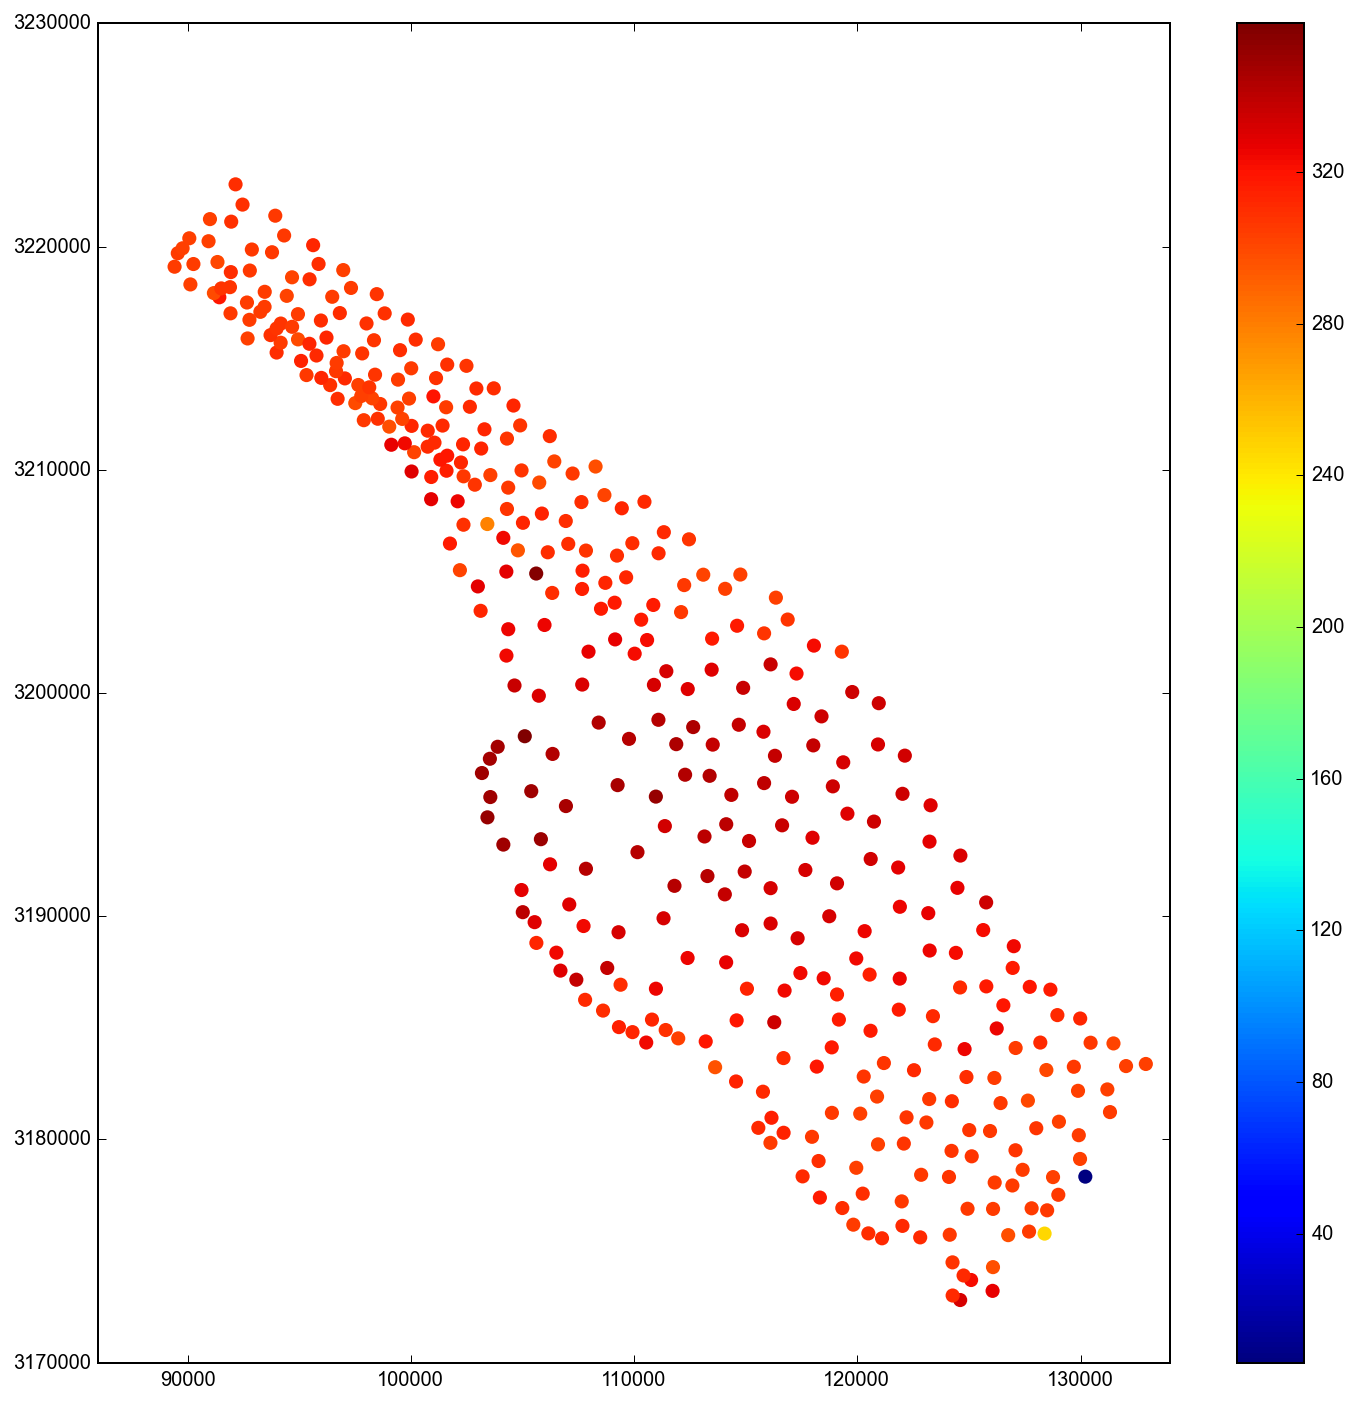

In [15]:
plt.figure(figsize=(12, 12))

plt.scatter(cx, cy, c=strikes,
           s=50, lw=0)
plt.colorbar()
plt.axis('equal')

plt.show()

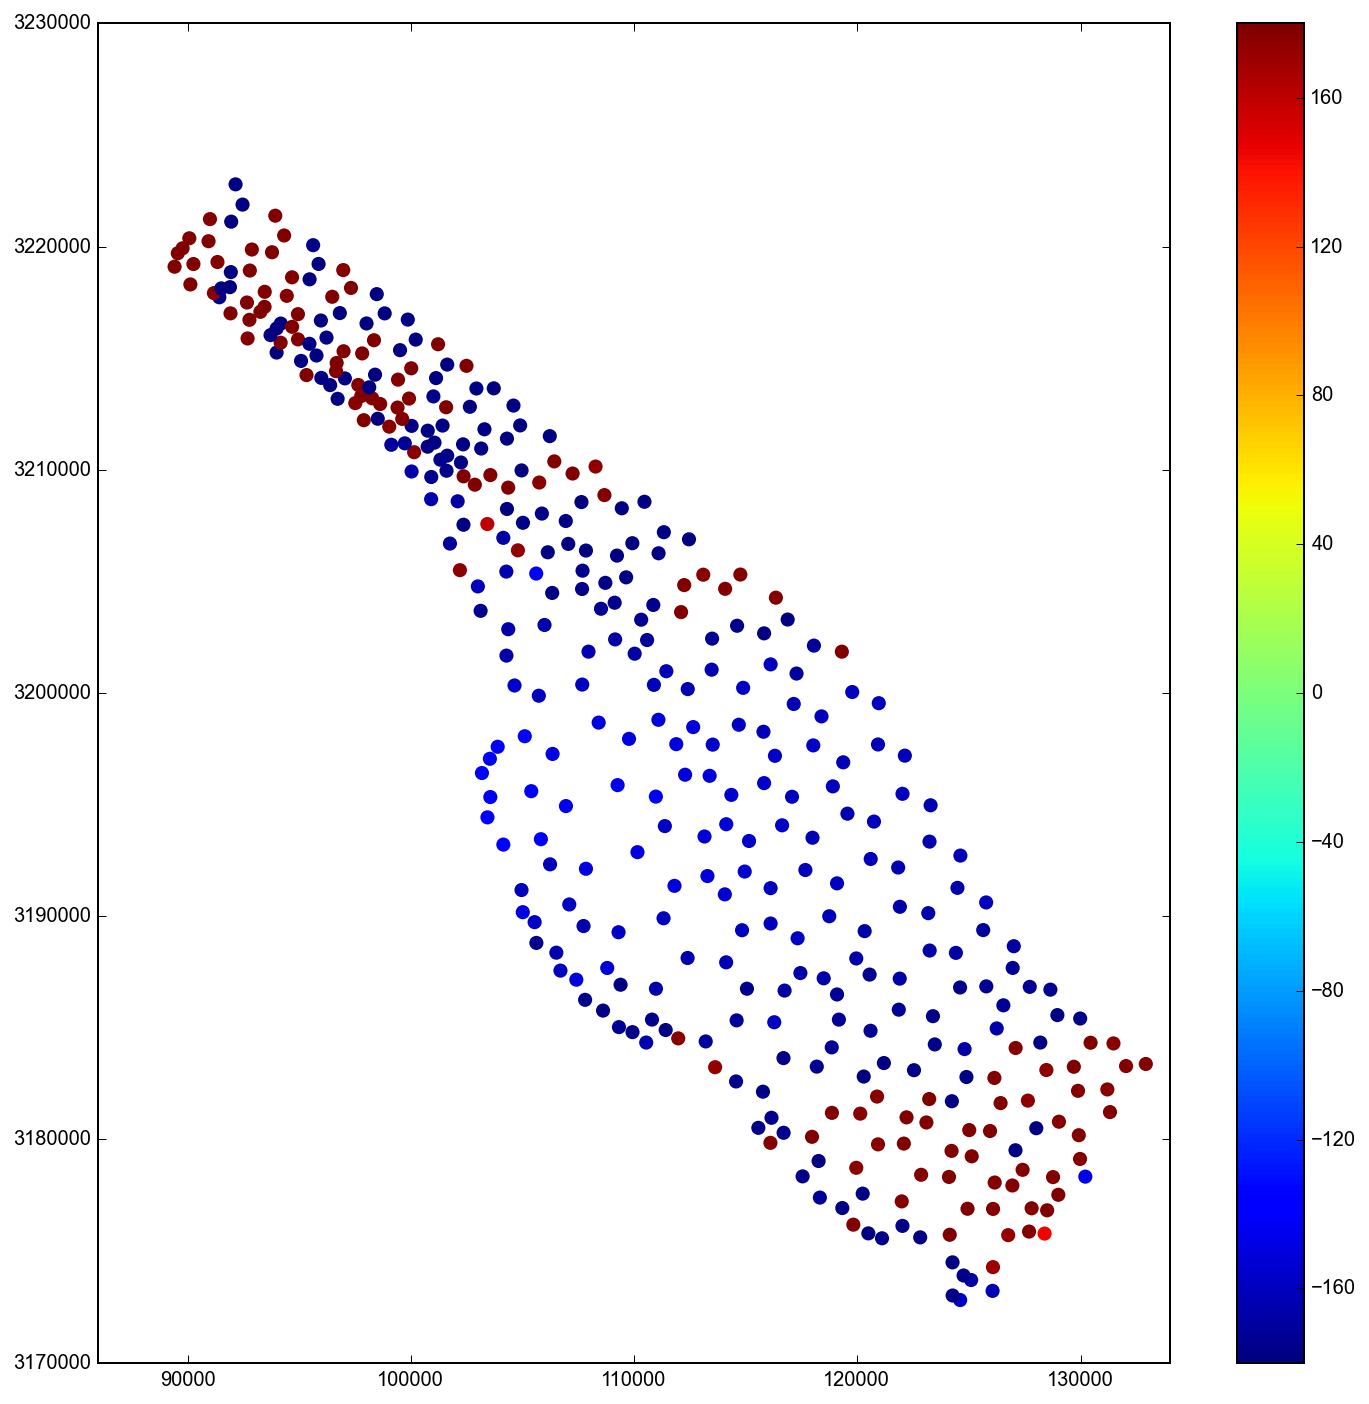

In [16]:
plt.figure(figsize=(12, 12))

plt.scatter(cx, cy, c=rakes,
           s=50, lw=0)
plt.colorbar()
plt.axis('equal')

plt.show()